In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("Processed_LiverDataset.csv")
data.head(10)

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
0,65.0,0.530628,0.095310,5.236442,2.833213,2.944439,6.8,3.3,0.90,1.0,1,0
1,62.0,1.840550,1.308333,6.146062,4.174387,4.615121,7.5,3.2,0.74,1.0,0,1
2,62.0,1.840550,1.308333,6.146062,4.110874,4.234107,7.0,3.3,0.89,1.0,0,1
3,58.0,0.693147,0.336472,5.209486,2.708050,3.044522,6.8,3.4,1.00,1.0,0,1
4,72.0,1.589235,1.098612,5.278115,3.332205,4.094345,7.3,2.4,0.40,1.0,0,1
5,46.0,1.029619,0.530628,5.342334,2.995732,2.708050,7.6,4.4,1.30,1.0,0,1
6,26.0,0.641854,0.182322,5.043425,3.583519,2.564949,7.0,3.5,1.00,1.0,1,0
7,29.0,0.641854,0.262364,5.313206,2.708050,2.484907,6.7,3.6,1.10,1.0,1,0
8,17.0,0.641854,0.262364,5.313206,3.135494,2.995732,7.4,4.1,1.20,0.0,0,1
9,55.0,0.530628,0.182322,5.673323,3.988984,4.077537,6.8,3.4,1.00,1.0,0,1


In [45]:
# Replace all problematic whitespace-like characters
data.columns = data.columns.str.strip().str.replace(r'[\u200b\u00a0\u202f\uff60]', '', regex=True)


In [46]:
data.head(10)

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result,Gender of the patient_Female,Gender of the patient_Male
0,65.0,0.530628,0.095310,5.236442,2.833213,2.944439,6.8,3.3,0.90,1.0,1,0
1,62.0,1.840550,1.308333,6.146062,4.174387,4.615121,7.5,3.2,0.74,1.0,0,1
2,62.0,1.840550,1.308333,6.146062,4.110874,4.234107,7.0,3.3,0.89,1.0,0,1
3,58.0,0.693147,0.336472,5.209486,2.708050,3.044522,6.8,3.4,1.00,1.0,0,1
4,72.0,1.589235,1.098612,5.278115,3.332205,4.094345,7.3,2.4,0.40,1.0,0,1
5,46.0,1.029619,0.530628,5.342334,2.995732,2.708050,7.6,4.4,1.30,1.0,0,1
6,26.0,0.641854,0.182322,5.043425,3.583519,2.564949,7.0,3.5,1.00,1.0,1,0
7,29.0,0.641854,0.262364,5.313206,2.708050,2.484907,6.7,3.6,1.10,1.0,1,0
8,17.0,0.641854,0.262364,5.313206,3.135494,2.995732,7.4,4.1,1.20,0.0,0,1
9,55.0,0.530628,0.182322,5.673323,3.988984,4.077537,6.8,3.4,1.00,1.0,0,1


In [47]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "Processed_LiverDataset.csv"  # Ensure the correct path
df = pd.read_csv(file_path)

# Encode target variable if categorical
target = "Result"  # Replace with your actual target column
if df[target].dtype == 'object':  
    label_encoder = LabelEncoder()
    df[target] = label_encoder.fit_transform(df[target])  

# Define features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
print(X.value_counts)

<bound method DataFrame.value_counts of        Age of the patient  Total Bilirubin  Direct Bilirubin  \
0                    65.0         0.530628          0.095310   
1                    62.0         1.840550          1.308333   
2                    62.0         1.840550          1.308333   
3                    58.0         0.693147          0.336472   
4                    72.0         1.589235          1.098612   
...                   ...              ...               ...   
19083                58.0         1.360977          0.832909   
19084                28.0         1.064711          0.693147   
19085                50.0         1.163151          0.693147   
19086                54.0         1.840550          1.308333   
19087                48.0         1.064711          0.693147   

       Alkphos Alkaline Phosphotase  Sgpt Alamine Aminotransferase  \
0                          5.236442                       2.833213   
1                          6.146062                

In [49]:
print(y.value_counts)

<bound method IndexOpsMixin.value_counts of 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
19083    1.0
19084    1.0
19085    1.0
19086    1.0
19087    1.0
Name: Result, Length: 19088, dtype: float64>


## Training XGBoost, RandomForest,Ensemble(RandomForest + XGBoost)

In [50]:
print(X.value_counts)
print(y_train.value_counts)

<bound method DataFrame.value_counts of        Age of the patient  Total Bilirubin  Direct Bilirubin  \
0                    65.0         0.530628          0.095310   
1                    62.0         1.840550          1.308333   
2                    62.0         1.840550          1.308333   
3                    58.0         0.693147          0.336472   
4                    72.0         1.589235          1.098612   
...                   ...              ...               ...   
19083                58.0         1.360977          0.832909   
19084                28.0         1.064711          0.693147   
19085                50.0         1.163151          0.693147   
19086                54.0         1.840550          1.308333   
19087                48.0         1.064711          0.693147   

       Alkphos Alkaline Phosphotase  Sgpt Alamine Aminotransferase  \
0                          5.236442                       2.833213   
1                          6.146062                

In [51]:
# Train XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Define Stacking Model with Logistic Regression as the meta-learner
stacking_model = StackingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model)], 
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking_model.fit(X_train, y_train)

# Save models
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(stacking_model, "ensemble_model.pkl")



['ensemble_model.pkl']

In [52]:
# Predictions & Accuracy
xgb_pred = xgb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
ensemble_pred = stacking_model.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_pred)
rf_acc = accuracy_score(y_test, rf_pred)
ensemble_acc = accuracy_score(y_test, ensemble_pred)

print(f"XGBoost Accuracy: {xgb_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Ensemble Model Accuracy: {ensemble_acc:.4f}")



XGBoost Accuracy: 0.9971
Random Forest Accuracy: 0.9974
Ensemble Model Accuracy: 0.9976


## Training Svm, Knn, Mlpnn, LgBoost

In [13]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.5 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score

#  Standardize features (for SVM, KNN, MLPNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

# --------------------------------------------
#  Train and Save Different Models
# --------------------------------------------

# 🔹 1. Support Vector Machine (SVM)
svm_model = SVC(probability=True, kernel="rbf", C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
joblib.dump(svm_model, "svm_model.pkl")

# 🔹 2. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
joblib.dump(knn_model, "knn_model.pkl")

# 🔹 3. Multi-Layer Perceptron Neural Network (MLPNN)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation="relu", solver="adam", max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
joblib.dump(mlp_model, "mlp_model.pkl")


# 🔹 4. LightGBM
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_params = {
    "objective": "binary",
    "metric": "binary_error",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "boosting_type": "gbdt"
}
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100)
joblib.dump(lgb_model, "lgb_model.pkl")

# --------------------------------------------
# 📌 Model Evaluation on Test Set
# --------------------------------------------

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

print("\n Model Accuracies on Test Data:")
print("SVM:", end=" "); evaluate_model(svm_model, X_test_scaled, y_test)
print("KNN:", end=" "); evaluate_model(knn_model, X_test_scaled, y_test)
print("MLPNN:", end=" "); evaluate_model(mlp_model, X_test_scaled, y_test)


# LightGBM requires different prediction handling
y_pred_lgb = (lgb_model.predict(X_test) > 0.5).astype(int)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {acc_lgb:.4f}")

print("\n✅ All models trained and saved successfully!")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10889, number of negative: 4381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 15270, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.713098 -> initscore=0.910476
[LightGBM] [Info] Start training from score 0.910476

 Model Accuracies on Test Data:
SVM: Accuracy: 0.8007
KNN: Accuracy: 0.9379
MLPNN: Accuracy: 0.9832
LightGBM Accuracy: 0.9903

✅ All models trained and saved successfully!


In [56]:
# Function to Predict Cirrhosis for New Data
import joblib
import pandas as pd
def predict_cirrhosis(input_data, model_path="./models/ensemble_model.pkl"):
    model = joblib.load(model_path)
    df_input = pd.DataFrame([input_data])  # Convert dictionary to DataFrame
    prediction = model.predict(df_input)[0]
    return "Cirrhosis Detected" if prediction == 1 else "No Cirrhosis"

# Example Input for Prediction
new_patient = {
    "Age of the patient": 65.0,
    "Total Bilirubin": 1.6,
    "Direct Bilirubin": 0.8,
    "Alkphos Alkaline Phosphotase": 6.0,
    "Sgpt Alamine Aminotransferase": 4.5,
    "Sgot Aspartate Aminotransferase": 5.0,
    "Total Protiens": 5.0,
    "ALB Albumin": 2.5,
    "A/G Ratio Albumin and Globulin Ratio": 0.6,
    "Gender of the patient_Female": 0,
    "Gender of the patient_Male": 1
}
no_cirrhosis_patient = {
    "Age of the patient": 35.0,   # Middle-aged
    "Total Bilirubin": 0.7,       # Low-normal range
    "Direct Bilirubin": 0.2, 
    "Alkphos Alkaline Phosphotase": 4.8,   # Normal
    "Sgpt Alamine Aminotransferase": 3.0,  # Normal
    "Sgot Aspartate Aminotransferase": 3.5, # Normal
    "Total Protiens": 7.0,        # Normal protein levels
    "ALB Albumin": 4.5,          # Normal albumin levels
    "A/G Ratio Albumin and Globulin Ratio": 1.3,  # Normal A/G ratio
    "Gender of the patient_Female": 1,  # Female (Can be 0 for Male)
    "Gender of the patient_Male": 0
}


# Predict
print("Prediction for New Patient:", predict_cirrhosis(new_patient))
print("Prediction for New Patient:", predict_cirrhosis(no_cirrhosis_patient))


Prediction for New Patient: Cirrhosis Detected
Prediction for New Patient: No Cirrhosis


# Comprehensive Evaluation Metrics 

## 1. Model Performance Metrics

In [57]:
#Classification Metrics
# Accuracy – Overall correctness of the model.
# Precision – How many predicted positive cases are actually positive.
# Recall (Sensitivity, True Positive Rate) – How well the model detects actual positive cases.
# Specificity (True Negative Rate) – How well the model detects actual negative cases.
# F1-score – Harmonic mean of precision and recall.
# Matthews Correlation Coefficient (MCC) – Balanced measure for imbalanced datasets.
# Cohen’s Kappa – Measures the agreement between actual and predicted classes.

In [58]:
# 1. Classification Report
import joblib
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, matthews_corrcoef, cohen_kappa_score
)
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "Processed_LiverDataset.csv"  # Ensure the correct path
df = pd.read_csv(file_path)

# Encode target variable if categorical
target = "Result"  # Replace with your actual target column
if df[target].dtype == 'object':  
    label_encoder = LabelEncoder()
    df[target] = label_encoder.fit_transform(df[target])  

# Define features (X) and target (y)
X = df.drop(columns=[target])
y = df[target]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


🔹 Loading model: SVM


c:\Users\sohai\Desktop\Flasklogin\flask-mongo-auth\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


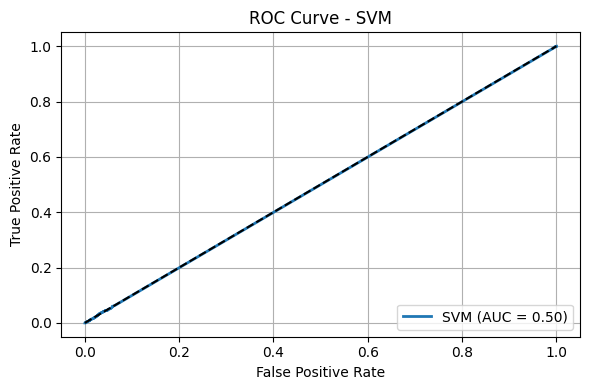

🔴 SVM
Accuracy: 0.7131
Precision: 0.7131
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 Score: 0.8325
MCC: 0.0000
Cohen’s Kappa: 0.0000
AUC Score: 0.4995

🔹 Loading model: KNN


c:\Users\sohai\Desktop\Flasklogin\flask-mongo-auth\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


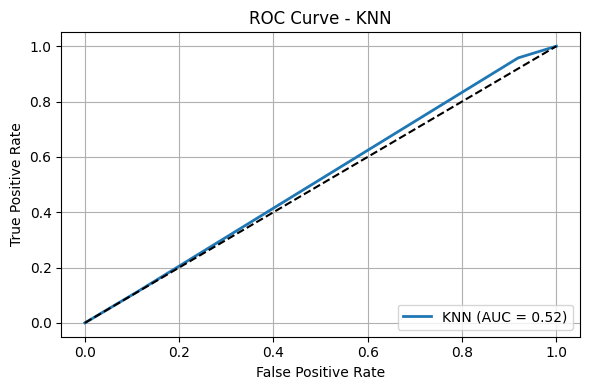

🔴 KNN
Accuracy: 0.7131
Precision: 0.7131
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 Score: 0.8325
MCC: 0.0000
Cohen’s Kappa: 0.0000
AUC Score: 0.5178

🔹 Loading model: MLPNN


c:\Users\sohai\Desktop\Flasklogin\flask-mongo-auth\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


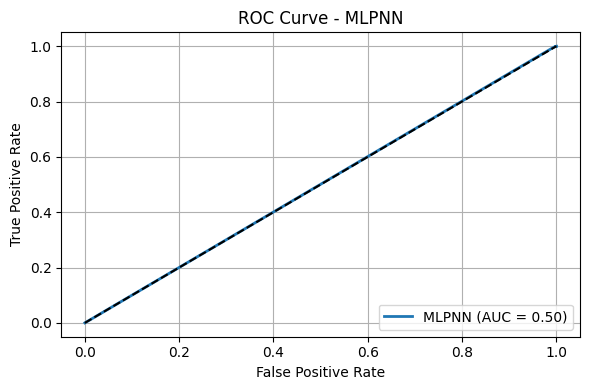

🔴 MLPNN
Accuracy: 0.7131
Precision: 0.7131
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 Score: 0.8325
MCC: 0.0000
Cohen’s Kappa: 0.0000
AUC Score: 0.5010

🔹 Loading model: Random Forest


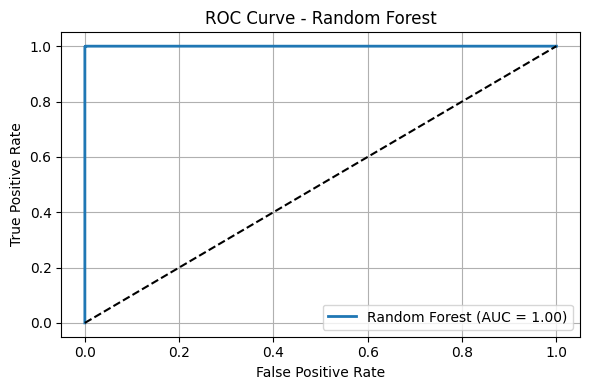

🔴 Random Forest
Accuracy: 0.9995
Precision: 0.9994
Recall (Sensitivity): 0.9999
Specificity: 0.9985
F1 Score: 0.9996
MCC: 0.9987
Cohen’s Kappa: 0.9987
AUC Score: 1.0000

🔹 Loading model: XGBoost


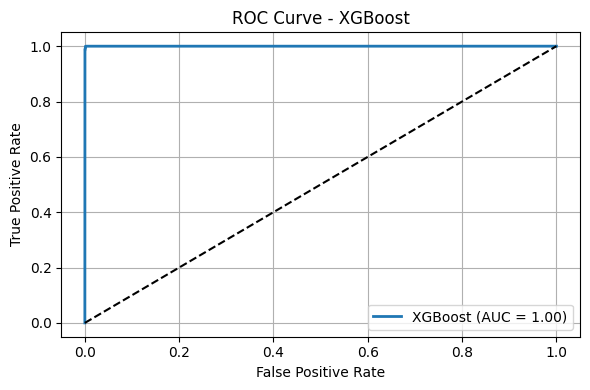

🔴 XGBoost
Accuracy: 0.9992
Precision: 0.9991
Recall (Sensitivity): 0.9998
Specificity: 0.9978
F1 Score: 0.9994
MCC: 0.9981
Cohen’s Kappa: 0.9981
AUC Score: 1.0000

🔹 Loading model: Ensemble (RF + XGB)


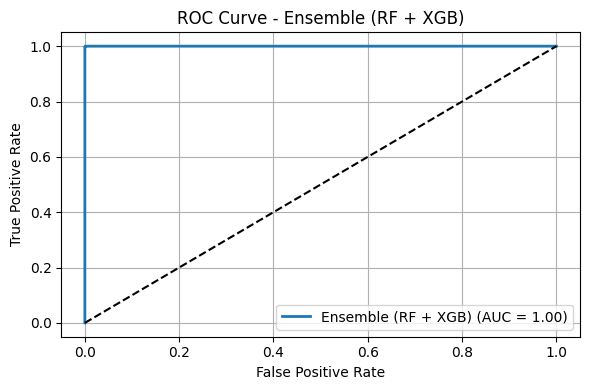

🔴 Ensemble (RF + XGB)
Accuracy: 0.9994
Precision: 0.9993
Recall (Sensitivity): 0.9999
Specificity: 0.9982
F1 Score: 0.9996
MCC: 0.9985
Cohen’s Kappa: 0.9985
AUC Score: 1.0000

🔹 Loading model: LightGBM


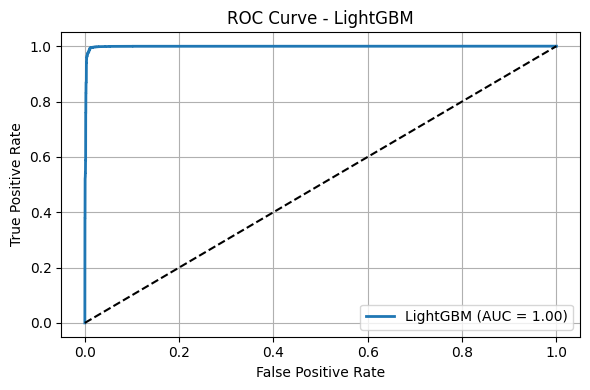

🔴 LightGBM
Accuracy: 0.9919
Precision: 0.9921
Recall (Sensitivity): 0.9965
Specificity: 0.9803
F1 Score: 0.9943
MCC: 0.9801
Cohen’s Kappa: 0.9801
AUC Score: 0.9985


In [59]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc, matthews_corrcoef, cohen_kappa_score
)

# Load test data
X_test = X
y_test = y

# Define model paths and names
model_paths = {
    "SVM": "models/svm_model.pkl",
    "KNN": "models/knn_model.pkl",
    "MLPNN": "models/mlp_model.pkl",
    "Random Forest": "models/rf_model.pkl",
    "XGBoost": "models/xgb_model.pkl",
    "Ensemble (RF + XGB)": "models/ensemble_model.pkl",
    "LightGBM": "models/lgb_model.pkl"
}

for model_name, path in model_paths.items():
    print(f"\n🔹 Loading model: {model_name}")
    model = joblib.load(path)

    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)  # Assume this is probability

    # Convert probabilities to binary predictions
    y_pred = (y_proba >= 0.5).astype(int)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"🔴 {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"Cohen’s Kappa: {kappa:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")



🔹 Loading model: SVM


c:\Users\sohai\Desktop\Flasklogin\flask-mongo-auth\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


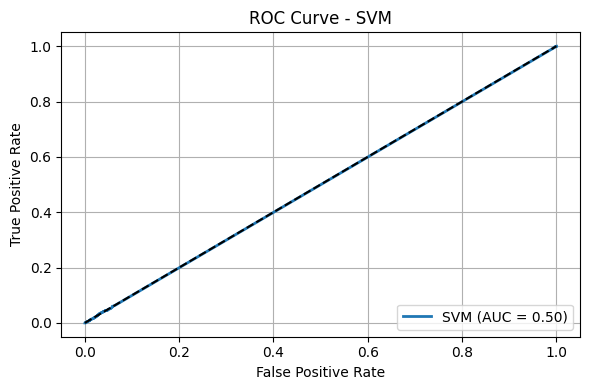

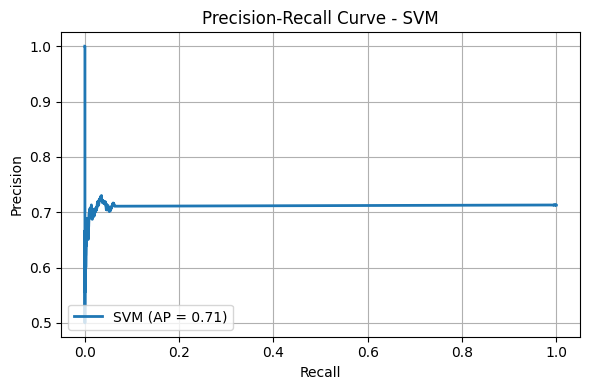

🔴 SVM
Accuracy: 0.7131
Precision: 0.7131
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 Score: 0.8325
MCC: 0.0000
Cohen’s Kappa: 0.0000
AUC-ROC Score: 0.4995
AUC-PR Score (Average Precision): 0.7124
Log Loss: 0.6248

🔹 Loading model: KNN


c:\Users\sohai\Desktop\Flasklogin\flask-mongo-auth\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


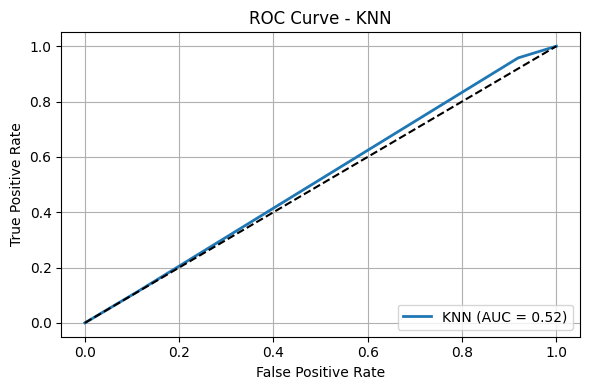

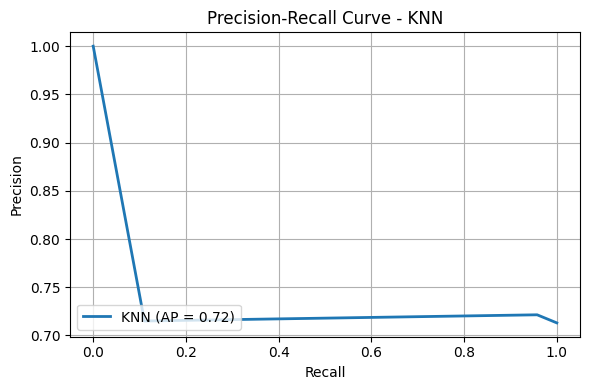

🔴 KNN
Accuracy: 0.7131
Precision: 0.7131
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 Score: 0.8325
MCC: 0.0000
Cohen’s Kappa: 0.0000
AUC-ROC Score: 0.5178
AUC-PR Score (Average Precision): 0.7204
Log Loss: 1.6765

🔹 Loading model: MLPNN


c:\Users\sohai\Desktop\Flasklogin\flask-mongo-auth\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


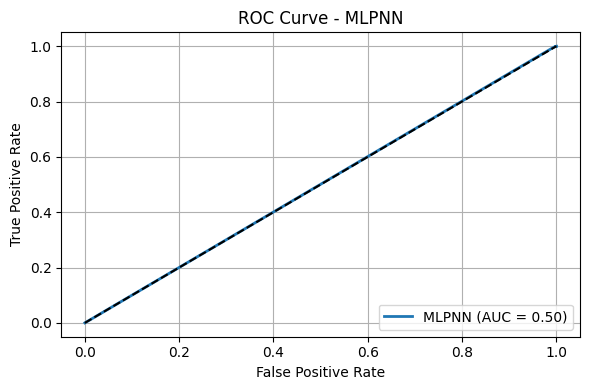

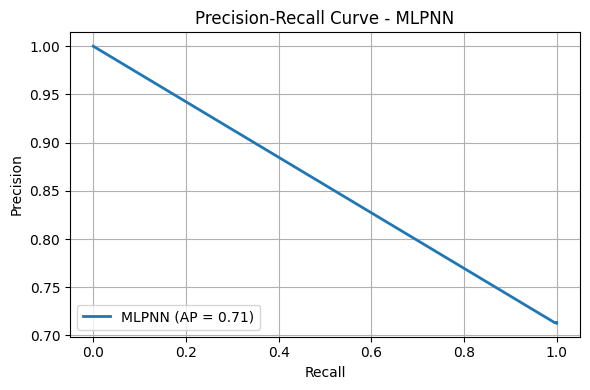

🔴 MLPNN
Accuracy: 0.7131
Precision: 0.7131
Recall (Sensitivity): 1.0000
Specificity: 0.0000
F1 Score: 0.8325
MCC: 0.0000
Cohen’s Kappa: 0.0000
AUC-ROC Score: 0.5010
AUC-PR Score (Average Precision): 0.7135
Log Loss: 10.3389

🔹 Loading model: Random Forest


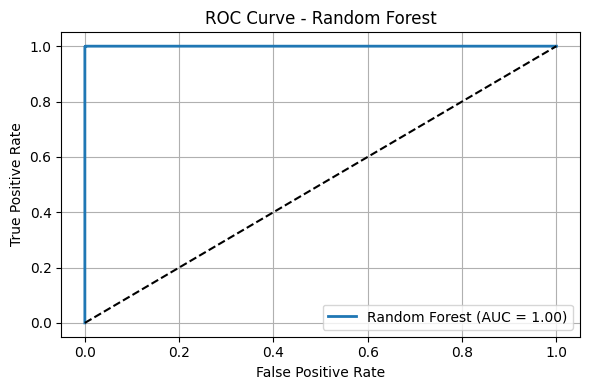

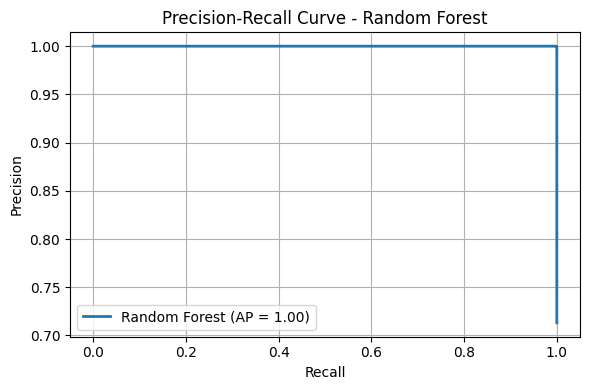

🔴 Random Forest
Accuracy: 0.9995
Precision: 0.9994
Recall (Sensitivity): 0.9999
Specificity: 0.9985
F1 Score: 0.9996
MCC: 0.9987
Cohen’s Kappa: 0.9987
AUC-ROC Score: 1.0000
AUC-PR Score (Average Precision): 1.0000
Log Loss: 0.0095

🔹 Loading model: XGBoost


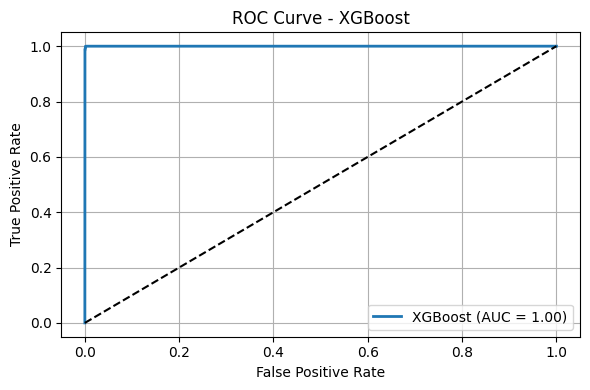

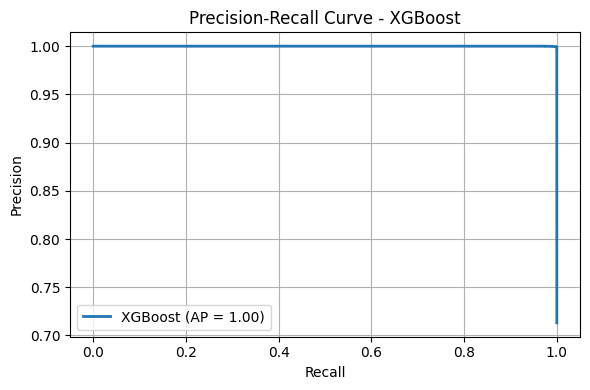

🔴 XGBoost
Accuracy: 0.9992
Precision: 0.9991
Recall (Sensitivity): 0.9998
Specificity: 0.9978
F1 Score: 0.9994
MCC: 0.9981
Cohen’s Kappa: 0.9981
AUC-ROC Score: 1.0000
AUC-PR Score (Average Precision): 1.0000
Log Loss: 0.0100

🔹 Loading model: Ensemble (RF + XGB)


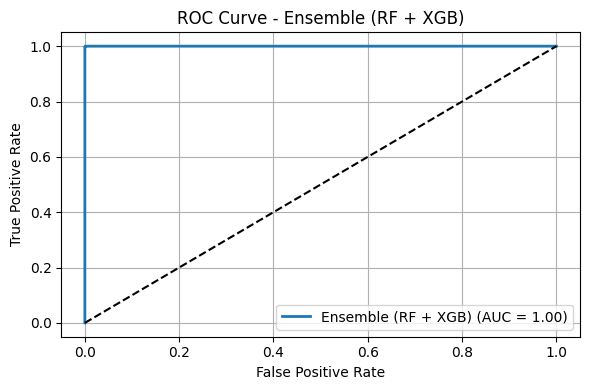

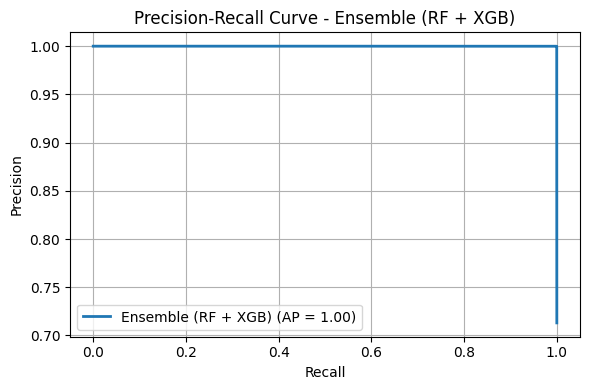

🔴 Ensemble (RF + XGB)
Accuracy: 0.9994
Precision: 0.9993
Recall (Sensitivity): 0.9999
Specificity: 0.9982
F1 Score: 0.9996
MCC: 0.9985
Cohen’s Kappa: 0.9985
AUC-ROC Score: 1.0000
AUC-PR Score (Average Precision): 1.0000
Log Loss: 0.0032

🔹 Loading model: LightGBM


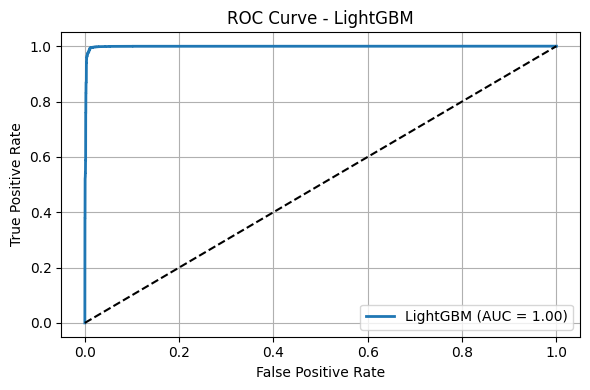

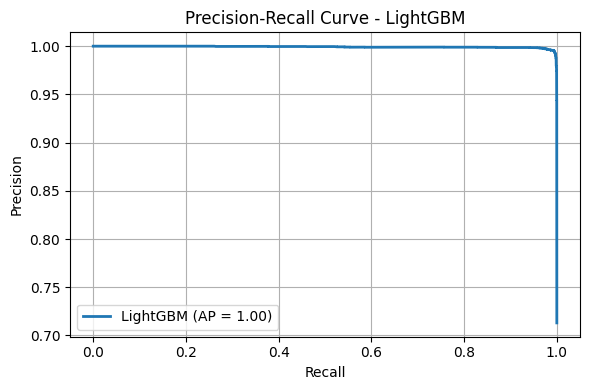

🔴 LightGBM
Accuracy: 0.9919
Precision: 0.9921
Recall (Sensitivity): 0.9965
Specificity: 0.9803
F1 Score: 0.9943
MCC: 0.9801
Cohen’s Kappa: 0.9801
AUC-ROC Score: 0.9985
AUC-PR Score (Average Precision): 0.9992
Log Loss: 0.1191


In [60]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    roc_curve, auc, matthews_corrcoef, cohen_kappa_score,
    average_precision_score, precision_recall_curve, log_loss
)

# Load test data
X_test = X
y_test = y

# Define model paths and names
model_paths = {
    "SVM": "models/svm_model.pkl",
    "KNN": "models/knn_model.pkl",
    "MLPNN": "models/mlp_model.pkl",
    "Random Forest": "models/rf_model.pkl",
    "XGBoost": "models/xgb_model.pkl",
    "Ensemble (RF + XGB)": "models/ensemble_model.pkl",
    "LightGBM": "models/lgb_model.pkl"
}

for model_name, path in model_paths.items():
    print(f"\n🔹 Loading model: {model_name}")
    model = joblib.load(path)

    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.predict(X_test)

    # Binary predictions
    y_pred = (y_proba >= 0.5).astype(int)

    # Classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)

    # Probabilistic metrics
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ap_score = average_precision_score(y_test, y_proba)
    loss = log_loss(y_test, y_proba)

    # ROC Curve Plot
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # PR Curve Plot
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(recall_vals, precision_vals, label=f"{model_name} (AP = {ap_score:.2f})", linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print metrics
    print(f"🔴 {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"Cohen’s Kappa: {kappa:.4f}")
    print(f"AUC-ROC Score: {roc_auc:.4f}")
    print(f"AUC-PR Score (Average Precision): {ap_score:.4f}")
    print(f"Log Loss: {loss:.4f}")


In [61]:
## 2. Implementing SHAP shapely Adaptive Expalinations identifies the most important features affecting the prediction.

In [1]:
# pip install shap

c:\Users\sohai\Desktop\Flasklogin\flask-mongo-auth\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



🔍 SHAP analysis for: SVM
⚠️ Could not compute SHAP values for SVM: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC(probability=True, random_state=42)

🔍 SHAP analysis for: KNN
⚠️ Could not compute SHAP values for KNN: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsClassifier()

🔍 SHAP analysis for: MLPNN
⚠️ Could not compute SHAP values for MLPNN: The passed model is not callable and cannot be analyzed directly with the given masker! Model: MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

🔍 SHAP analysis for: Random Forest


100%|===================| 38150/38176 [15:33<00:00]        

⚠️ Could not compute SHAP values for Random Forest: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.070000, while the model output was 0.040000. If this difference is acceptable you can set check_additivity=False to disable this check.

🔍 SHAP analysis for: XGBoost


 99%|===================| 18978/19088 [01:14<00:00]        

🔸 Feature Importance (Bar) - XGBoost


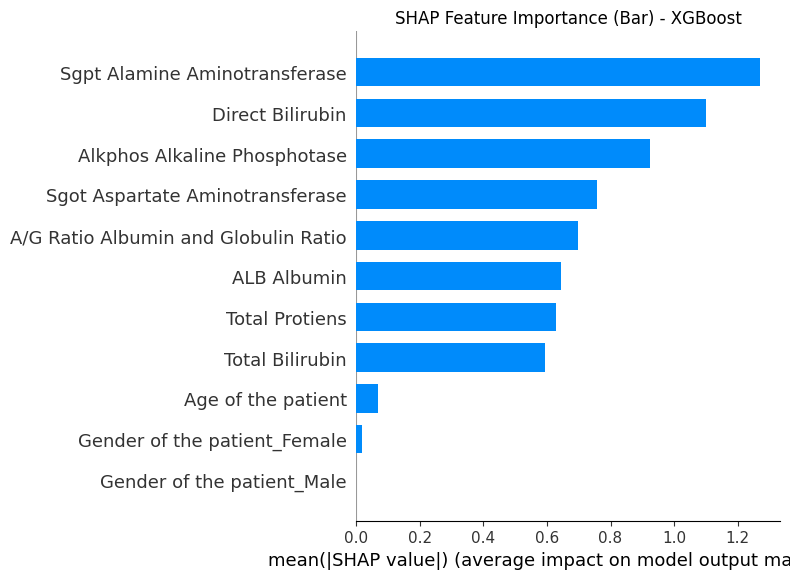

🔸 SHAP Beeswarm Plot - XGBoost


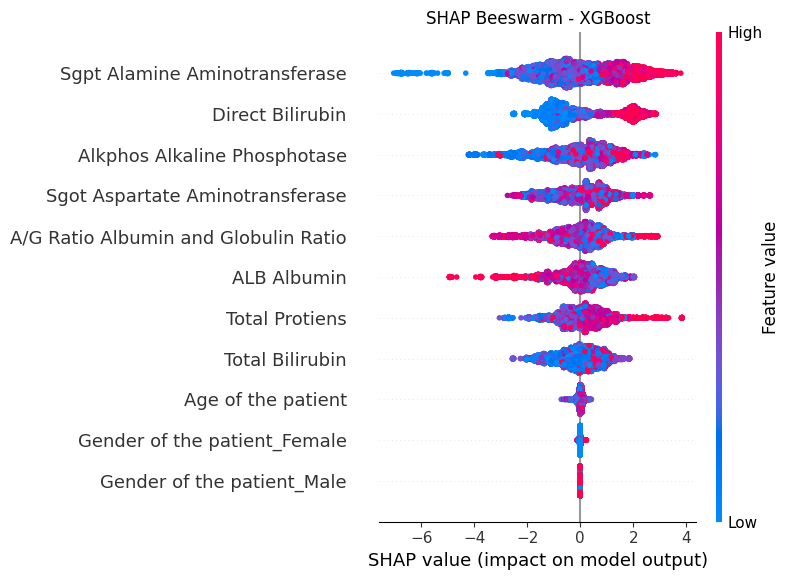


🔍 SHAP analysis for: Ensemble (RF + XGB)
⚠️ Could not compute SHAP values for Ensemble (RF + XGB): The passed model is not callable and cannot be analyzed directly with the given masker! Model: StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None,

 99%|===================| 18949/19088 [01:26<00:00]        

🔸 Feature Importance (Bar) - LightGBM


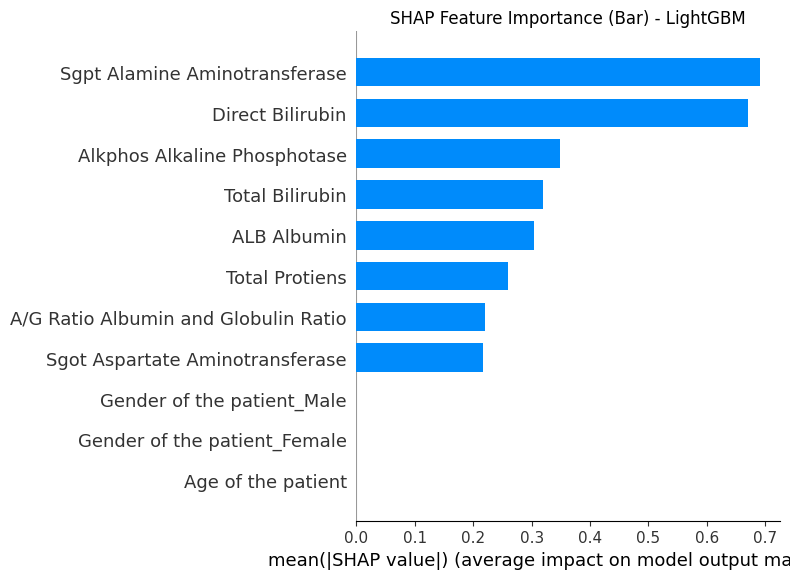

🔸 SHAP Beeswarm Plot - LightGBM


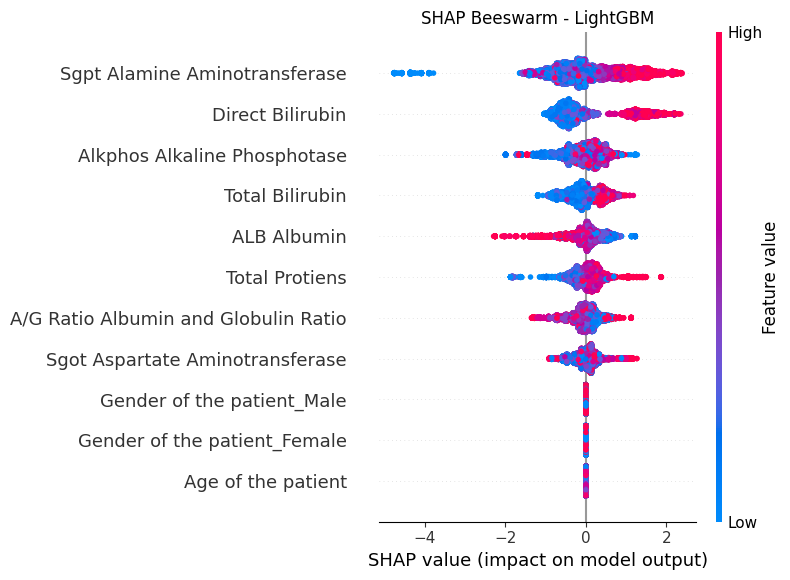

In [65]:
import shap
import joblib
import matplotlib.pyplot as plt
import warnings

# Optional: suppress SHAP warnings for cleaner output
warnings.filterwarnings("ignore")

# Dictionary of model names and paths
model_paths = {
    "SVM": "./models/svm_model.pkl",
    "KNN": "./models/knn_model.pkl",
    "MLPNN": "./models/mlp_model.pkl",
    "Random Forest": "./models/rf_model.pkl",
    "XGBoost": "./models/xgb_model.pkl",
    "Ensemble (RF + XGB)": "./models/ensemble_model.pkl",
    "LightGBM": "./models/lgb_model.pkl"
}

# Iterate over models
for model_name, path in model_paths.items():
    print(f"\n🔍 SHAP analysis for: {model_name}")
    
    try:
        model = joblib.load(path)

        # Create SHAP explainer
        explainer = shap.Explainer(model, X_test)

        # Get SHAP values
        shap_values = explainer(X_test)

        # Plot summary (bar + beeswarm)
        print(f"🔸 Feature Importance (Bar) - {model_name}")
        shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
        plt.title(f"SHAP Feature Importance (Bar) - {model_name}")
        plt.tight_layout()
        plt.show()

        print(f"🔸 SHAP Beeswarm Plot - {model_name}")
        shap.summary_plot(shap_values, X_test, show=False)
        plt.title(f"SHAP Beeswarm - {model_name}")
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ Could not compute SHAP values for {model_name}: {e}")


Permutation Importance = Analyse the contribution of each feature

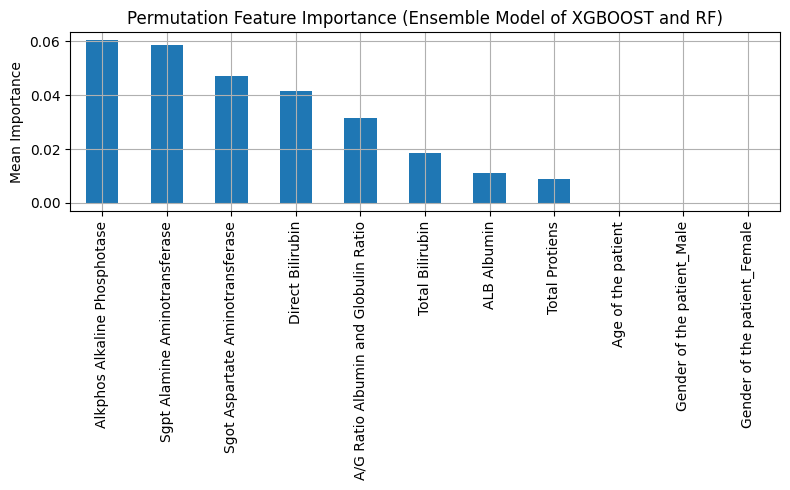

In [66]:
from sklearn.inspection import permutation_importance

# Example: Load model
model = joblib.load("models/ensemble_model.pkl")

# Run permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Sort and plot
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X_test.columns if hasattr(X_test, "columns") else [f"f{i}" for i in range(X_test.shape[1])]
importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(8, 5))
importances.plot(kind='bar')
plt.title("Permutation Feature Importance (Ensemble Model of XGBOOST and RF)")
plt.ylabel("Mean Importance")
plt.tight_layout()
plt.grid(True)
plt.show()


## 3. Model Comparison

1. Baseline Comparison
Include a simple Logistic Regression model to serve as a baseline.

🔹 Add Baseline Model

In [67]:
model_paths = {
    # 'Logistic Regression': './models/logreg_model.pkl',
    'SVM': './models/svm_model.pkl',
    'KNN': './models/knn_model.pkl',
    'MLPNN': './models/mlp_model.pkl',
    'Random Forest': './models/rf_model.pkl',
    'XGBoost': './models/xgb_model.pkl',
    'Ensemble (RF+XGB)': './models/ensemble_model.pkl'
}

models = {name: joblib.load(path) for name, path in model_paths.items()}


In [68]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    matthews_corrcoef, cohen_kappa_score, roc_auc_score,
    confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    spec = confusion_matrix(y_test, y_pred)[0, 0] / sum(confusion_matrix(y_test, y_pred)[0])
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 Evaluation for {name}:")
    print(f"Accuracy         : {acc:.4f}")
    print(f"Precision        : {prec:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity      : {spec:.4f}")
    print(f"F1-Score         : {f1:.4f}")
    print(f"MCC              : {mcc:.4f}")
    print(f"Cohen's Kappa    : {kappa:.4f}")
    print(f"AUC-ROC          : {auc:.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.grid(True)
    plt.show()




📊 Evaluation for Logistic Regression (Baseline):
Accuracy         : 0.7254
Precision        : 0.7579
Recall (Sensitivity): 0.9036
Specificity      : 0.2826
F1-Score         : 0.8244
MCC              : 0.2360
Cohen's Kappa    : 0.2173
AUC-ROC          : 0.7555


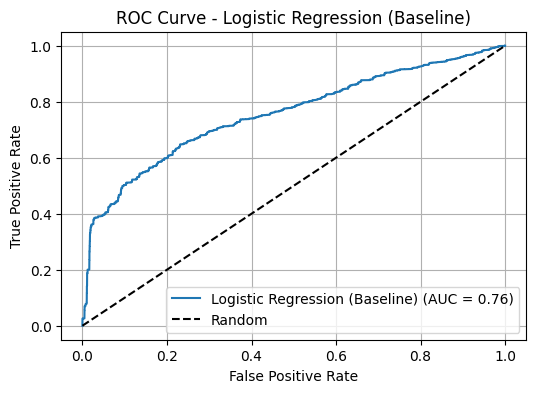

In [69]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)
baseline_pred = baseline_model.predict(X_test)
baseline_proba = baseline_model.predict_proba(X_test)[:, 1]

evaluate_model("Logistic Regression (Baseline)", baseline_model, X_test, y_test)


Step 2: Statistical Significance Testing
Compare model predictions using:

Paired t-test (if normal distribution of scores)

Wilcoxon signed-rank test (non-parametric)

In [70]:
import joblib

models = {
    "svm": joblib.load("models/svm_model.pkl"),
    "knn": joblib.load("models/knn_model.pkl"),
    "mlpnn": joblib.load("models/mlp_model.pkl"),
    "random_forest": joblib.load("models/rf_model.pkl"),
    "xgboost": joblib.load("models/xgb_model.pkl"),
    "ensemble": joblib.load("models/ensemble_model.pkl")  # Make sure this file exists!
}


In [71]:
from scipy.stats import ttest_rel, wilcoxon

ensemble_preds = models['ensemble'].predict(X_test)
xgb_preds = models['xgboost'].predict(X_test)

# Paired t-test
t_stat, p_value = ttest_rel(ensemble_preds, xgb_preds)
print(f"Paired t-test: t = {t_stat:.4f}, p = {p_value:.4f}")

# Wilcoxon test
try:
    w_stat, w_p = wilcoxon(ensemble_preds, xgb_preds)
    print(f"Wilcoxon test: stat = {w_stat:.4f}, p = {w_p:.4f}")
except ValueError as e:
    print("Wilcoxon test error:", e)


Paired t-test: t = -0.5773, p = 0.5637
Wilcoxon test: stat = 2.0000, p = 0.5637


Step 3: Compare Ensemble vs Individual Models
Create a comparison table using pandas:

In [72]:
import pandas as pd

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1 Score": f1,
        "AUC": auc,
        "MCC": mcc,
        "Kappa": kappa
    })

# Convert to DataFrame
comparison_df = pd.DataFrame(results)
print(comparison_df.sort_values(by="AUC", ascending=False))


           Model  Accuracy  Precision    Recall  Specificity  F1 Score  \
3  random_forest  0.999424   0.999486  0.999706     0.998722  0.999596   
5       ensemble  0.999371   0.999266  0.999853     0.998174  0.999559   
4        xgboost  0.999214   0.999119  0.999780     0.997809  0.999449   
1            knn  0.713066   0.713066  1.000000     0.000000  0.832503   
2          mlpnn  0.713066   0.713066  1.000000     0.000000  0.832503   
0            svm  0.713066   0.713066  1.000000     0.000000  0.832503   

        AUC       MCC     Kappa  
3  0.999998  0.998592  0.998591  
5  0.999998  0.998464  0.998463  
4  0.999984  0.998079  0.998079  
1  0.517757  0.000000  0.000000  
2  0.500953  0.000000  0.000000  
0  0.499533  0.000000  0.000000  


In [73]:
import joblib

model = joblib.load('./models/ensemble_model.pkl')
print(model.feature_names_in_)


['Age of the patient' 'Total Bilirubin' 'Direct Bilirubin'
 'Alkphos Alkaline Phosphotase' 'Sgpt Alamine Aminotransferase'
 'Sgot Aspartate Aminotransferase' 'Total Protiens' 'ALB Albumin'
 'A/G Ratio Albumin and Globulin Ratio' 'Gender of the patient_Female'
 'Gender of the patient_Male']


In [34]:
import joblib 
model = joblib.load("./models/ensemble_model.pkl")
print(model.feature_names_in_)


['Age of the patient' 'Total Bilirubin' 'Direct Bilirubin'
 'ﾠAlkphos Alkaline Phosphotase' 'ﾠSgpt Alamine Aminotransferase'
 'Sgot Aspartate Aminotransferase' 'Total Protiens' 'ﾠALB Albumin'
 'A/G Ratio Albumin and Globulin Ratio' 'Gender of the patient_Female'
 'Gender of the patient_Male']
